In [1]:
import numpy as np
import spectral_analysis as sa
from math import floor
import matplotlib.pyplot as plt

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Uniwerek\\Lab\\ZPS\\ZPS_QPL_ML\\spectral_analysis.py'>

5025000


d:\Uniwerek\Lab\ZPS\ZPS_QPL_ML\spectral_analysis.py:1066: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


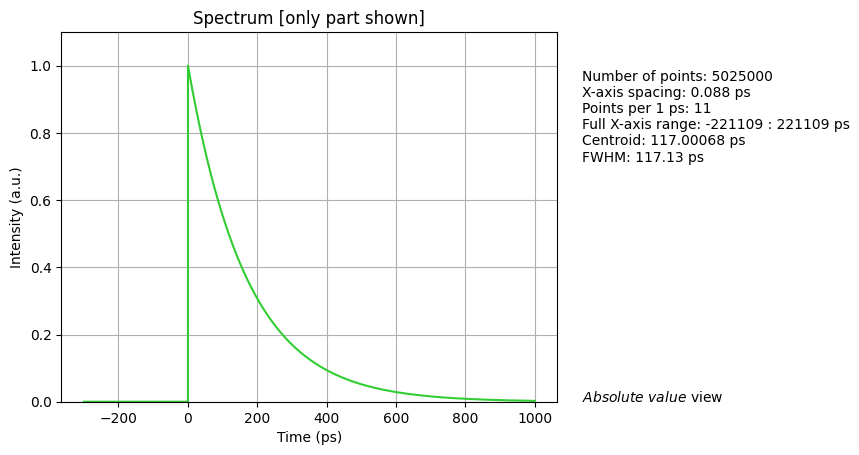

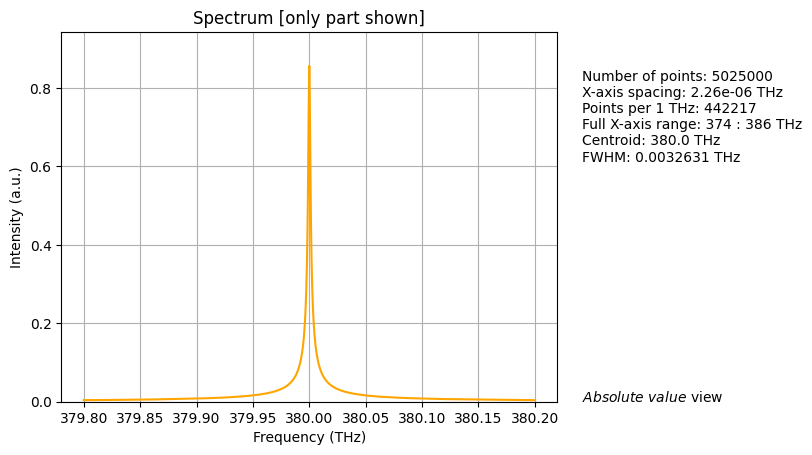

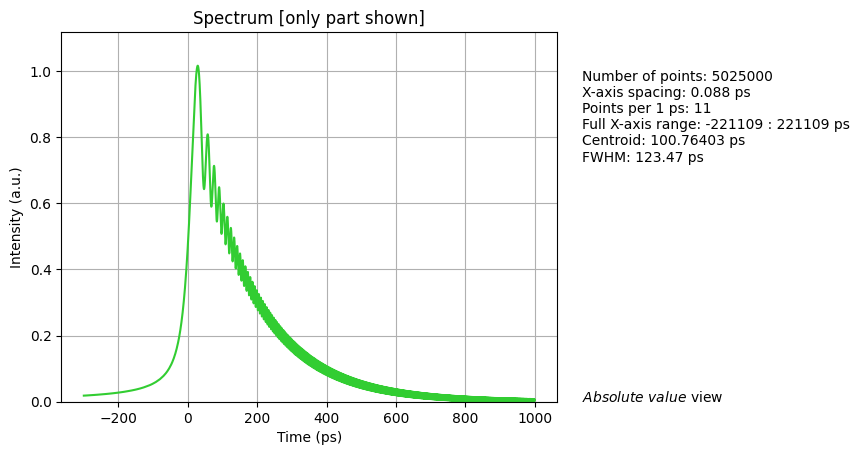

In [139]:
scale = 5

num = scale*5000
bandwidth = [-1100, 1100]

Y = np.flip(np.exp(1*np.linspace(-10, 3, num)) - np.exp(-10))
for i in range(0, floor(1/3*num)):
    Y[i] = 0
Y = Y/np.max(np.abs(Y))
Y = np.roll(Y, +scale*834)
X = np.linspace(bandwidth[0], bandwidth[1], num)
spectrum_out = sa.spectrum(X = X, Y = Y, x_type ="time", y_type ="intensity")
spectrum_out.zero_padding(100*num)
print(len(spectrum_out))
sa.plot(spectrum_out, start = -300, end = 1000, what_to_plot = "abs")
spectrum_out.inv_fourier()
spectrum_out.X += 380
chirp_phase = sa.chirp_phase(np.real(spectrum_out.X), np.mean(np.real(spectrum_out.X)), 2e4, len(spectrum_out))
spectrum_out.Y = spectrum_out.Y*np.exp(1j*chirp_phase)
#sa.plot(spectrum_out, start = 379.9, end = 380.1)
sa.plot(spectrum_out, what_to_plot = "abs", start = 379.8, end = 380.2)
spectrum_out.fourier()
sa.plot(spectrum_out, start = -300, end = 1000, what_to_plot = "abs")

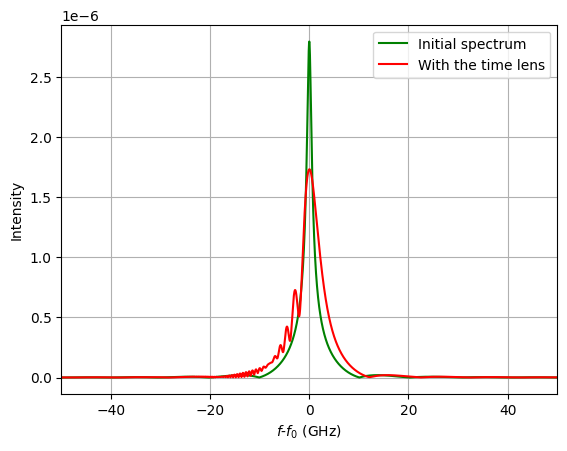

In [107]:
scale = 10

num = scale*5000
bandwidth = [-22500, 22500]

Y = np.flip(np.exp(10*np.linspace(-10, 3, num)) - np.exp(-100))
for i in range(0, floor(1/3*num)):
    Y[i] = 0
Y = np.roll(Y, +scale*834)
X = np.linspace(bandwidth[0], bandwidth[1], num)
spectrum_out = sa.spectrum(X = X, Y = Y, x_type ="time", y_type ="intensity")
spectrum_out.moving_average(100)
spectrum_zero = spectrum_out.copy()
t_phase = 1.5e4*np.linspace(-1, 0.98, num)**2
spectrum_out.Y = spectrum_out.Y*np.exp(1j*t_phase)
spectrum_out.inv_fourier()
spectrum_zero.inv_fourier()

plt.plot((spectrum_zero.X)*1000, np.abs(spectrum_zero.Y), color = "green")
plt.plot((spectrum_out.X)*1000, np.abs(spectrum_out.Y), color = "red")
plt.grid()
plt.legend(["Initial spectrum", "With the time lens"])
plt.ylabel("Intensity")
plt.xlim([-50, 50])
plt.xlabel(r"$f$-$f_0$ (GHz)")
plt.show()